<a href="https://colab.research.google.com/github/mirandoli/Jupyter-Tutoriais/blob/master/Desafio_Mod1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importando as bibliotecas
import pandas as pd #bbt para tratamento de dados via dataframes 
import numpy as np #bbt para tratamento de valores numéricos (vetores e matrizes)
import matplotlib.pyplot as plt #bbt para construir os gráficos
import seaborn as sn #bbt para deixar os plots mais bonitos
from sklearn.model_selection import train_test_split, train_test_split, KFold, cross_val_score, cross_val_predict # esse método é utilizado para dividir o 
                                                    # conjunto de dados em grupos de treinamento e test #bbt para a divisão do dataset entre treinamento e teste
from sklearn.metrics import confusion_matrix, accuracy_score #utilizada para verificar a acurácia do modelo construído
from scipy.optimize import curve_fit # biblioteca necessária para realiza a otimização dos MSE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score #método para o cálculo do R2
from sklearn import tree         # importa o algoritmo arvore de decisão
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression #importa o algoritmo de regressão logística
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm


In [ ]:
from google.colab import files #bbt carregar arquivos para o colab
uploaded = files.upload()

Saving comp_bikes_mod.csv to comp_bikes_mod (2).csv


In [ ]:
# Leitura do dadaset 
nome_arquivo = "comp_bikes_mod.csv"
dataframe_bikes = pd.read_csv(nome_arquivo)

In [ ]:
# visualização das 5 primeiras linhas do dataset pela função .head()
dataframe_bikes.head(17379)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0000,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375.0,2012-12-31,NaN,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0
17375,17376.0,2012-12-31,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,NaN,NaN,89.0
17376,17377.0,NaN,1.0,1.0,12.0,21.0,0.0,1.0,1.0,1.0,0.26,0.2576,0.60,0.1642,7.0,83.0,90.0
17377,NaN,2012-12-31,1.0,1.0,NaN,NaN,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0


In [ ]:
# visualização dos tipos e quantidades de variáveis e análise da existência de valores nulos 
dataframe_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [ ]:
# verificação no número de instâncias e atributos 
dataframe_bikes.shape

(17379, 17)

In [ ]:
# Tratamento dos valores nulos 
nans = dataframe_bikes.isna().sum() # Conta a quantidade de valores nulos 
nans[nans > 0]

instant       1738
dteday        1738
season        1738
yr            1738
mnth          1738
hr            1738
holiday       1738
weekday       1738
workingday    1738
weathersit    1738
temp          1738
atemp         1738
hum           1738
windspeed     1738
casual        1738
registered    1738
cnt           1738
dtype: int64

In [ ]:
# (Tentando) excluir os valores nulos da coluna dteday
dataframe_bikes.dropna(subset=['dteday'], inplace=True)
dataframe_bikes.head()
# verificando a contagem de valores nulos na coluna "dteday"
nans2 = dataframe_bikes.isna().sum()
nans2[nans2>0]

instant       1581
season        1580
yr            1565
mnth          1579
hr            1573
holiday       1565
weekday       1563
workingday    1544
weathersit    1563
temp          1575
atemp         1565
hum           1571
windspeed     1559
casual        1570
registered    1551
cnt           1562
dtype: int64

Como a coluna "dteday" não aparece, conlui-se que não existem valores nulos nela

In [ ]:
#Verificando a nova quantidade de instâncias e atributos
dataframe_bikes.shape 

(15641, 17)

In [ ]:
# Análise estatísca do dataset
dataframe_bikes.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14060.000000,14061.000000,14076.000000,14062.000000,14068.000000,14076.000000,14078.000000,14097.000000,14078.000000,14066.000000,14076.000000,14070.000000,14082.000000,14071.000000,14090.000000,14079.000000
mean,8679.717496,2.507930,0.501563,6.542810,11.486779,0.027707,3.006535,0.683053,1.422432,0.496926,0.476055,0.627357,0.189552,35.416317,153.280625,189.165850
std,5015.960092,1.110674,0.500015,3.443693,6.915101,0.164137,2.002829,0.465303,0.638937,0.192971,0.172827,0.192863,0.122309,48.770799,151.317869,181.223589
min,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4336.250000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8677.500000,3.000000,1.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13024.250000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,219.000000,280.000000
max,17376.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
# Converter a coluna "season" para o tipo categórica
dataframe_bikes['season'].astype('category')

1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
        ... 
17373    1.0
17374    NaN
17375    1.0
17377    1.0
17378    NaN
Name: season, Length: 15641, dtype: category
Categories (4, float64): [1.0, 2.0, 3.0, 4.0]

In [ ]:
# Converter a coluna "dteday" para o tipo "datetime"
dataframe_bikes['dteday']=pd.to_datetime(dataframe_bikes['dteday'])
#Verificando a última data tresente no dataset (YYYY-MM-DD)
dataframe_bikes.head(17380)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
5,6.0,2011-01-01,1.0,0.0,1.0,5.0,0.0,6.0,0.0,2.0,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17373,17374.0,2012-12-31,1.0,1.0,12.0,18.0,0.0,1.0,1.0,2.0,0.26,NaN,0.48,0.1343,10.0,112.0,122.0
17374,17375.0,2012-12-31,NaN,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0
17375,17376.0,2012-12-31,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,NaN,NaN,89.0
17377,NaN,2012-12-31,1.0,1.0,NaN,NaN,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0


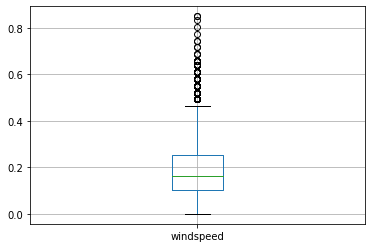

In [ ]:
# Verificação da existência de outliers
dataframe_bikes[['windspeed']].boxplot()

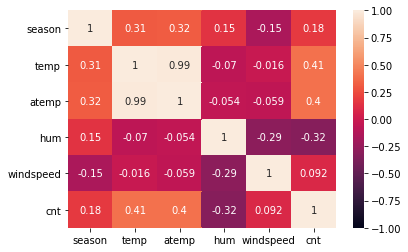

<Figure size 1080x1080 with 0 Axes>

In [ ]:
# Criando a matriz de correlação
new_df = dataframe_bikes[['season','temp','atemp','hum','windspeed','cnt']]
matriz_de_correlacao = new_df.corr() #gera a matriz de correlação
sn.heatmap(matriz_de_correlacao, annot=True, vmin=-1, vmax=1)
plt.figure(figsize=(15,15)) # Tamanho figura da matriz
plt.show()

In [ ]:
# Substituindo os valores nulos das respectivas colunas pelos valores médios
dataframe_bikes['hum'].fillna(dataframe_bikes['hum'].mean(), inplace=True)
dataframe_bikes['cnt'].fillna(dataframe_bikes['cnt'].mean(), inplace=True)
dataframe_bikes['casual'].fillna(dataframe_bikes['casual'].mean(), inplace=True)

In [ ]:
# Regressão linear utilizando "hum" e "casual" como independentes e a "cnt" como dependente.
x=dataframe_bikes[['hum', 'casual']].values #transforma a série em array
# x2=dataframe_bikes['casual'].values #idem
y=dataframe_bikes['cnt'].values #idem

In [ ]:
# Construção do modelo de regressão
reg = LinearRegression()
x_reshaped=x.reshape((-2,2)) # dados em 2D. OBS com (-1,1) não rodou, provavelmete pq temos duas variáveis independentes
# x2_reshaped=x2.reshape((-1,1)) # idem
regressão = reg.fit(x_reshaped, y) # Realiza a regressão

In [ ]:
previsao=reg.predict(x_reshaped)

In [ ]:
# Parâmetros encontrados
print('Y = {}X + {}'.format(reg.coef_,reg.intercept_))

R2 = r2_score(y, previsao)  #realiza o cálculo do R2

print("Coeficiente de Determinação (R2):", R2)


Y = [-99.75012328   2.21512197]X + 173.29337505135578
Coeficiente de Determinação (R2): 0.4059859251122173


In [ ]:
# construindo os modelos de classificação
modelos = [LogisticRegression(solver='liblinear'), RandomForestClassifier(n_estimators=400, random_state=42), 
          DecisionTreeClassifier(random_state=42), svm.SVC(kernel='rbf', gamma='scale', random_state=42), 
          KNeighborsClassifier()]

In [ ]:
# Separando o dataset entre entradas e saídas
x = dataframe_bikes.iloc[:1].values
y = dataframe_bikes.iloc[:1].values

In [ ]:
# VALIDAÇÃO CRUZADA aplicação
kfold = KFold(n_splits=5 , shuffle=True, random_state=42) # divide o dataset em 5 grupos 

In [ ]:
# # validação cruzada utilização
# mean=[]
# std=[]
# for model in modelos:
#     result = cross_val_score(model, x, y, cv=KFold, scoring='accuracy', n_jobs=-1)
#     mean.append(result)
#     std.append(result)

**Regressão com Árvore de Decisão:**

In [ ]:
new_new_df = dataframe_bikes[['hum','casual','cnt']]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(new_new_df)

In [ ]:
from sklearn.tree import DecisionTreeRegressor # Já importada anteriormente, mas só para ter certeza haha

In [ ]:
entrada_tree = scaled_df[:,1].reshape(-1,1) # entrada da regressão para a Árvore
saida_tree = scaled_df[:,1].reshape(-1,1) # saída da regressão para Árvore

In [ ]:
# Divisão dos dados entre treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(entrada_tree, saida_tree, test_size = 0.30, random_state = 42) 

In [ ]:
arvore_regressora = DecisionTreeRegressor() # Definição do objeto para a árvore de decisão como regressora
# Aplicação da regressão
arvore_regressora.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# Realizando a previsão
previsao_arvore = arvore_regressora.predict(x_test)

In [ ]:
from sklearn import metrics
print('Erro absoluto: ', metrics.mean_absolute_error(y_test, previsao_arvore))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, previsao_arvore))

Erro absoluto:  3.106827436595505e-05
Mean Squared Error:  1.231736108263192e-07


In [ ]:
# Parâmetros encontrados para Árvore de Decisão

R2_Tree = r2_score(y_test, previsao_arvore)  # cálculo do R2

print("Coeficiente de Determinação da Árvore de Decisão (R2_Tree):", R2_Tree)

Coeficiente de Determinação da Árvore de Decisão (R2_Tree): 0.9999921823117321
